# Let's try to get Gang's plots reproduced

In [17]:
import matplotlib.pyplot as plt
import uproot
import csv
import numpy as np
import combineHistos

In [32]:
global mu_allowed 
mu_allowed = True

def get_data(filename, importantColumn=1, delr = ' '):
    output = []
    with open(filename) as file:
        line_reader = []
        if delr=='':
            line_reader = csv.reader(file)
        else:
            line_reader = csv.reader(file, delimiter=delr)
        for row in line_reader:
            output.append(float(row[importantColumn]))
    return np.array(output)

def  get_epsilon(sigIn, path_to_eff, datg, dtyp):
    # I'm not entirely sure what cut efficiency He pulls, so I'll just do the ratio of the first to the last for now
    # efficiencies = get_data(path_to_eff, importantColumn=0, delr=' ')
    # # print(efficiencies)
    # epsee = 6e-3 if typ=='JF' else 1
    # print(sigIn*(efficiencies[-1]/efficiencies[0])*(10**3)*35.9 * epsee)
    # return sigIn*(efficiencies[-1]/efficiencies[0])*(10**3)*35.9 * epsee
    epsilsons = {'ZZ': 301.185,
                 'WZ': 215.361,
                 'ttbarJF': 82.2581,
                 'W3j': 707.111}
    return epsilsons[dtyp]

def to_plot(datasDict, eff_path_dict, datgr):
    sigs = {'JF':{'ttbarJF':63.83, 'W3j':380.8}, 
            'diboson':{'WZ':24.61, 'ZZ':35.19}}
    # print(datasDict)
    # epsilons = []
    # for dt in datasDict:
    #     thisEps = get_epsilon(sigs[datgr][dt], eff_path_dict[dt], datgr)
    #     epsilons.append(thisEps)
    # print("hello", epsilons)
    # print([get_epsilon(sigs[datgr][dt], eff_path_dict[dt], datgr)*datasDict[dt] for dt in datasDict])
    return (1.3 if datgr=='diboson' else 1) * np.sum(np.array([get_epsilon(sigs[datgr][dt], eff_path_dict[dt], datgr, dt)*datasDict[dt] for dt in datasDict]), axis=0)

def diboson_plot(datasDict,eff_path_dict):
    sig_WZ = 24.61
    sig_ZZ = 35.19 # check if these match with what I had found
    return 1.3 * (get_epsilon(sig_WZ, eff_path_dict['WZ'], 'diboson') * datasDict['WZ'] + get_epsilon(sig_ZZ, eff_path_dict['ZZ'], 'diboson')*datasDict['ZZ'])
    
def JF_plot(datasDict,eff_path_dict):
    sig_ttbar = 63.83
    sig_W3j = 380.8# 408.7 for 14TeV # check if these match with what I had found
    return (get_epsilon(sig_ttbar, eff_path_dict['ttbarJF'], 'JF') * datasDict['ttbarJF'] + get_epsilon(sig_W3j, eff_path_dict['W3j'], 'JF')*datasDict['W3j'])

def file_path_formatting(inDir, tag, dtp, is_dib):
    # print(dtp)
    return inDir + tag + ('jj' if is_dib else '') + dtp+ ('_ee' if not is_dib else '')+ '.dat'

def my_scaling(eventType):
    Lumin = 35.9e3
    fakerate = 8e-8
    eff_dict = {'ttbar': {'sigmaLO': 63.83, 'events': (204_320, 1), 'sigmaNLO': 888, 'Br':17.756*fakerate},
                'W3j': {'sigmaLO': 380.8, 'events': (209_675, 250), 'sigmaNLO': 50.0, 'Br':21.34*fakerate},
                'WZ2j': {'sigmaLO': 24.61, 'events': (212_215, 414), 'sigmaNLO':55.2, 'Br':1.436},
                'ZZ2j': {'sigmaLO': 35.19, 'events': (213_388, 286), 'sigmaNLO':16.8, 'Br':0.453}}
    
    # JF_extra = 10e-3 if mu_allowed else 1
    # DB_extra = 10e-3 if mu_allowed else 2.6
    # adhocExtra = JF_extra if eventType=='ttbar' or eventType == 'W3j' else DB_extra
    adhocExtra = 1
    ratio = "{:e}".format(eff_dict[eventType]['events'][1]/eff_dict[eventType]['events'][0])
    # print(eventType, "eff ratio ", ratio)
    # print(eventType, " ")
    # print(mu_allowed)
    # print("JF", JF_extra)
    # print('diboson', DB_extra)
    
    return 35.9e3 * eff_dict[eventType]['sigmaNLO'] * eff_dict[eventType]['events'][1]/eff_dict[eventType]['events'][0] * adhocExtra * eff_dict[eventType]['Br']
    # return 1
    

In [33]:
path_to_Gang = '/Users/dysonk/Work/Gang_analysis/'
gang_diboson_path = 'prompt_NR_highSR1/'

# WZ_Gang_raw_mllWj_file_name = path_to_Gang+gang_diboson_path+'Mll_jjWZ.dat'
# WZ_MllWj_raw_Masses = get_data(WZ_Gang_raw_mllWj_file_name)
# eps_WZ = get_epsilon(sig_WZ, path_to_Gang+gang_diboson_path+'cut_eff_jjWZ.dat')
# ZZ_Gang_raw_mllWj_file_name = path_to_Gang+gang_diboson_path+'Mll_jjZZ.dat'
# ZZ_MllWj_raw_Masses = get_data(ZZ_Gang_raw_mllWj_file_name)
# eps_ZZ = get_epsilon(sig_ZZ, path_to_Gang+gang_diboson_path+'cut_eff_jjZZ.dat')


CMS_mllWj1_file_name = path_to_Gang+gang_diboson_path+'mllW_1.dat'
CMS_mllWj3_file_name = path_to_Gang+gang_diboson_path+'mllW_3.dat'
CMS_to_plot = get_data(CMS_mllWj3_file_name) - get_data(CMS_mllWj1_file_name)

# print(WZ_MllWj_raw_Masses)
# with open(WZ_Gang_raw_mllWj_file_name) as File:
#     Line_reader = csv.reader(File, delimiter=' ')
#     for row in Line_reader:
#         WZ_MllWj_raw_Masses.append(float(row[1]))



ll   diboson  CMS:  849.5
l1   diboson  CMS:  828.8851351351352
l2   diboson  CMS:  827.3542600896861
ll   JF  CMS:  849.5
l1   JF  CMS:  828.8851351351352
l2   JF  CMS:  827.3542600896861


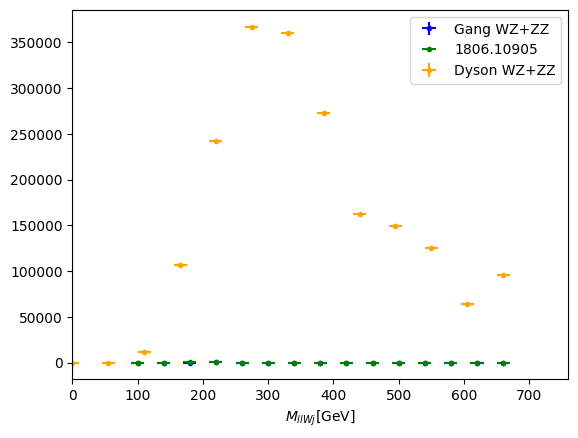

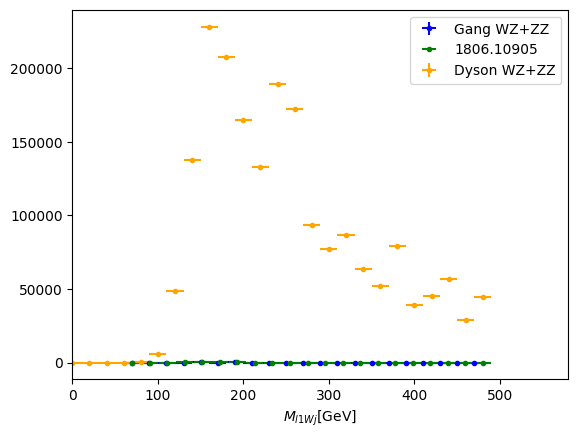

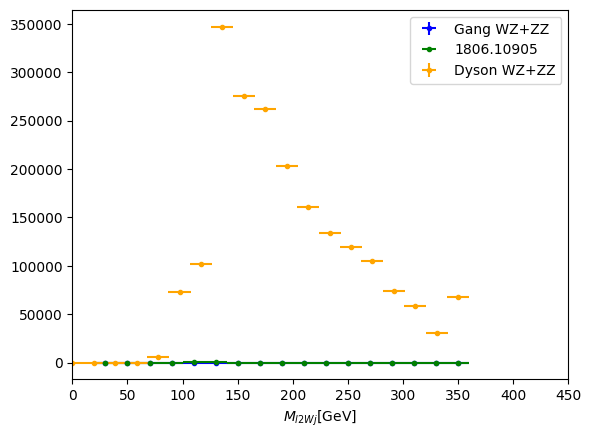

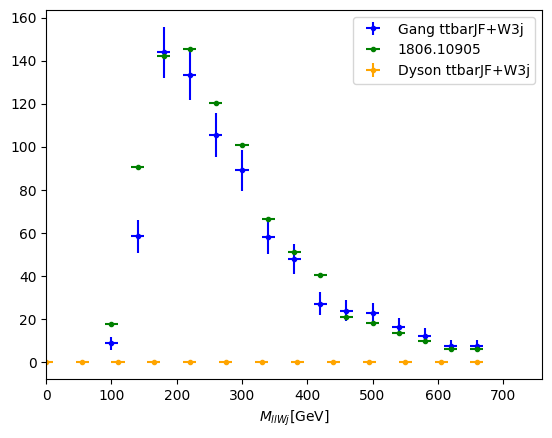

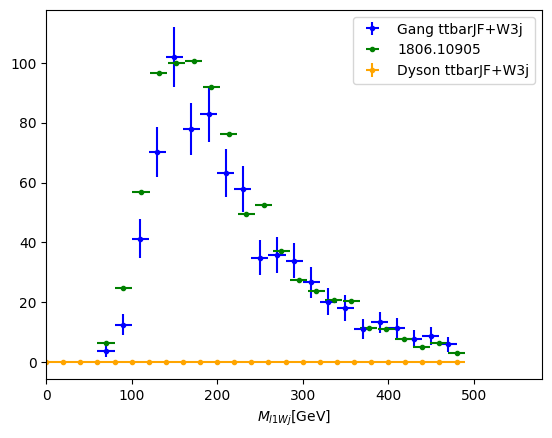

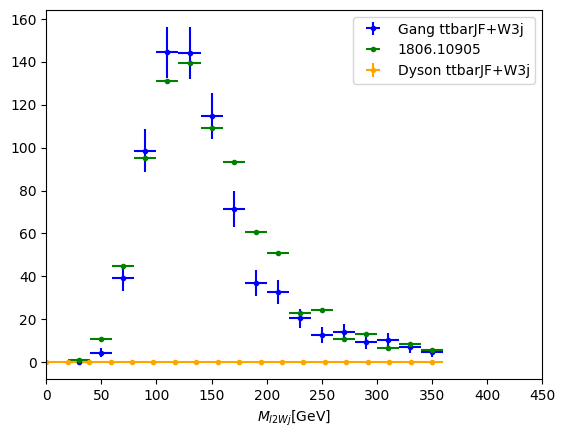

In [ ]:
GangFileTags = {'ll':'MllW_',
                 'l1':'Ml1W_',
                 'l2':'Ml2W_'}
CMSFileTags = {'ll': 'mllW_',
               'l1': 'ml1W_',
               'l2': 'ml2W_'}
plotTitles = {'ll': '$M_{llWj}$',
              'l1': '$M_{l1Wj}$',
              'l2': '$M_{l2Wj}$'}
plot_lc = {'diboson': {'label':'WZ+ZZ', 'color':'blue', 'CMScolor':'green'},
               'JF': {'label':'ttbarJF+W3j', 'color':'blue', 'CMScolor':'green'}}

CMS_linspaces = {'ll': np.linspace(100, 660, 15),
                 'l1': np.linspace(70, 480, 21), 
                 'l2': np.linspace(30, 350, 17)}
GangdatGroups = {'diboson': ['WZ', 'ZZ'], 'JF': ['ttbarJF', 'W3j']}
MydatGroups = {'diboson': ['WZ2j', 'ZZ2j'], 'JF': ['ttbar', 'W3j']}
gang_paths = {'diboson':'prompt_NR_highSR1/',
              'JF': 'jetfake_NR_highSR1/'}
my_start_dir = f'/Users/dysonk/Work/Good comparisons/GangOrder/{'muAnde' if mu_allowed else 'just_ee'}/AnalysisOutput/'
my_FileTags = {'ll': 'Mass_2jW2l',
               'l1': 'Mass_2jW1l0',
               'l2': 'Mass_2jW1l1'}

my_scale_factor = {'ZZ2j': 1,
                 'WZ2j': 1,
                 'ttbar': 1,
                 'W3j': 1}
# my_scale_factor = {'ZZ2j': 301.185e-2,
#                  'WZ2j': 215.361e-2,
#                  'ttbar': 82.2581/2,
#                  'W3j': 707.111e-2}
for dg in GangdatGroups:
    init_dir = path_to_Gang+gang_paths[dg]

    for htyp in GangFileTags:
        is_dibson = True if dg=='diboson' else False
        # print(is_dibson)
        fig, axes = plt.subplots()
        dattypes = GangdatGroups[dg]
        GangFileNames = {dtyp: file_path_formatting(init_dir, GangFileTags[htyp], dtyp, is_dibson) for dtyp in dattypes}
        # print(GangFileNames)
        datas = {dtyp: get_data(GangFileNames[dtyp]) for dtyp in dattypes}
        efficiencies = {dtyp: file_path_formatting(init_dir, GangFileTags[htyp], dtyp, is_dibson) for dtyp in dattypes}
        theseMasses = to_plot(datas, efficiencies, dg)
        Mass_range = get_data(GangFileNames[GangdatGroups[dg][0]], importantColumn=0)
        axes.set_xlabel(plotTitles[htyp]+'[GeV]')
        axes.errorbar(Mass_range, theseMasses, xerr=10, yerr=(theseMasses)**(1/2), label = 'Gang '+plot_lc[dg]['label'], color=plot_lc[dg]['color'], fmt='.')


        CMS_to_plot = get_data(init_dir+CMSFileTags[htyp]+'3.dat') - get_data(init_dir+CMSFileTags[htyp]+'1.dat')
        CMS_nEvents = np.sum(CMS_to_plot)
        # axes.scatter(CMS_linspaces[htyp], CMS_to_plot, label='1806.10905', color=plot_lc[dg]['CMScolor'])
        axes.errorbar(CMS_linspaces[htyp], CMS_to_plot, xerr = 10, label='1806.10905', color=plot_lc[dg]['CMScolor'], fmt='.')
        myData = {}
        my_y = np.zeros(50)
        myDataPlot = 0
        for dt in MydatGroups[dg]:
            myData.update({dt:combineHistos.get_data(dt, my_FileTags[htyp], my_start_dir)})
        # print(myData[0]['bounds'])
            my_y = np.linspace(myData[dt]['bounds'][0], myData[dt]['bounds'][1], len(myData[dt]['data']))
            # (1.3*2.3 if dg=='diboson' else 0.625) * 
            myDataPlot = my_scaling(dt) * myData[dt]['data'] if type(myDataPlot)==int else myDataPlot + my_scaling(dt) * myData[dt]['data']
            # print(myDataPlot)
        # if dg == 'diboson':
        print(htyp, " ", dg, " CMS: ", CMS_nEvents)
        myDataPlot = myDataPlot #* CMS_nEvents
        plt.errorbar(my_y,  myDataPlot, xerr=10, yerr=(myDataPlot)**(1/2), label=f'Dyson {plot_lc[dg]['label']}', color = 'orange', fmt='.')

        axes.set_xlim(0, CMS_linspaces[htyp][-1]+100)
        axes.legend()

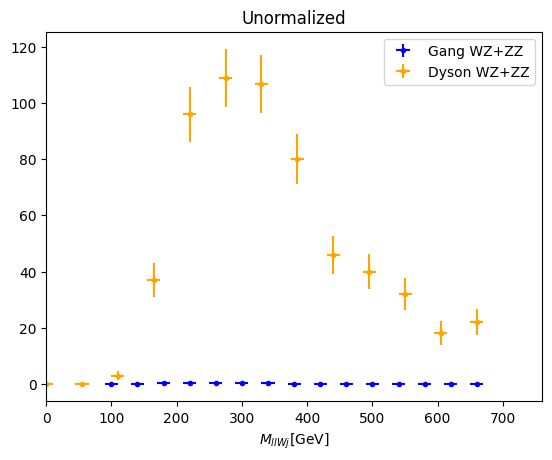

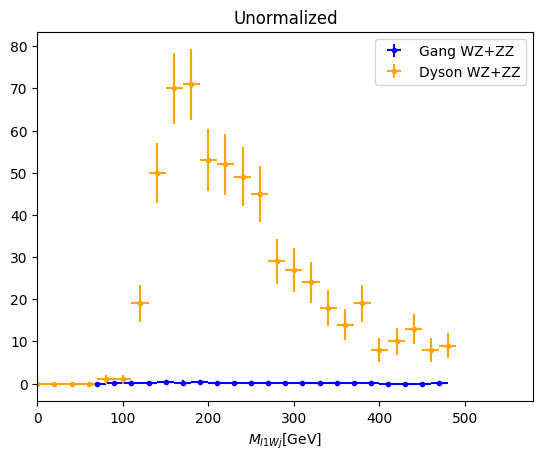

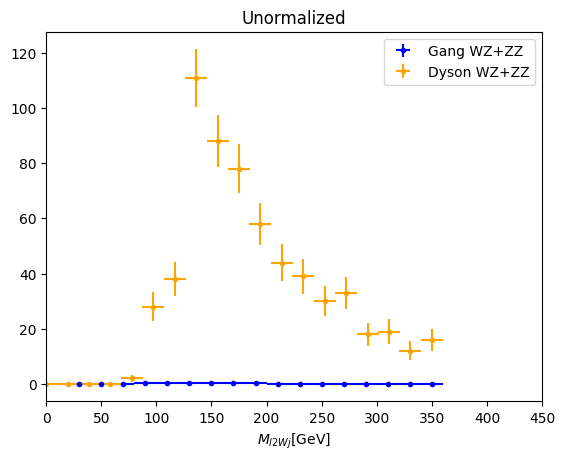

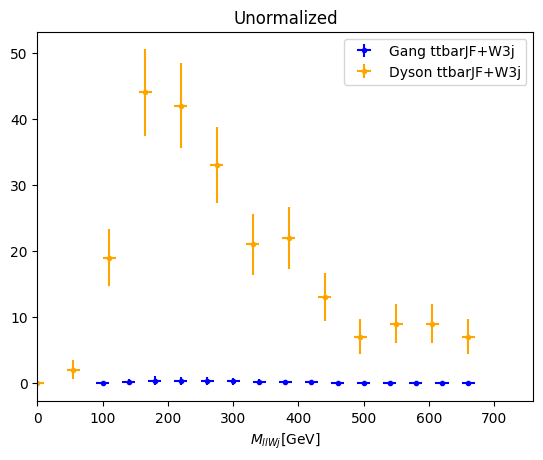

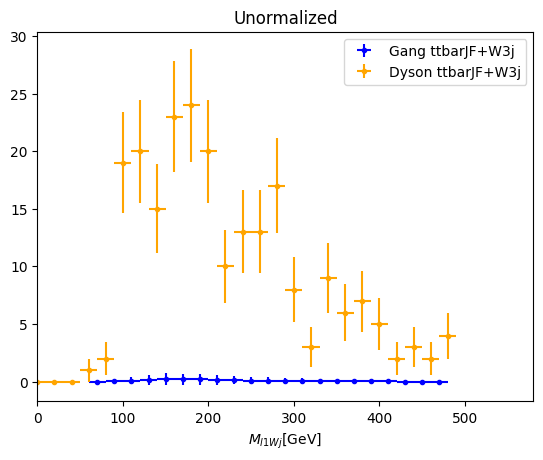

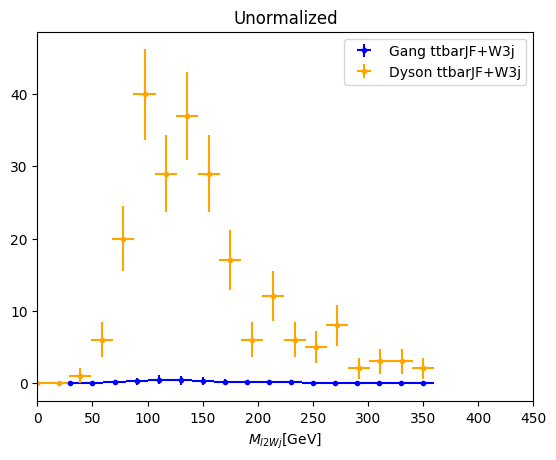

In [31]:
GangFileTags = {'ll':'MllW_',
                 'l1':'Ml1W_',
                 'l2':'Ml2W_'}
CMSFileTags = {'ll': 'mllW_',
               'l1': 'ml1W_',
               'l2': 'ml2W_'}
plotTitles = {'ll': '$M_{llWj}$',
              'l1': '$M_{l1Wj}$',
              'l2': '$M_{l2Wj}$'}
plot_lc = {'diboson': {'label':'WZ+ZZ', 'color':'blue', 'CMScolor':'green'},
               'JF': {'label':'ttbarJF+W3j', 'color':'blue', 'CMScolor':'green'}}

CMS_linspaces = {'ll': np.linspace(100, 660, 15),
                 'l1': np.linspace(70, 480, 21), 
                 'l2': np.linspace(30, 350, 17)}
GangdatGroups = {'diboson': ['WZ', 'ZZ'], 'JF': ['ttbarJF', 'W3j']}
MydatGroups = {'diboson': ['WZ2j', 'ZZ2j'], 'JF': ['ttbar', 'W3j']}
gang_paths = {'diboson':'prompt_NR_highSR1/',
              'JF': 'jetfake_NR_highSR1/'}
my_start_dir = f'/Users/dysonk/Work/Good comparisons/{'muAnde' if mu_allowed else 'just_ee'}/AnalysisOutput/'
my_FileTags = {'ll': 'Mass_2jW2l',
               'l1': 'Mass_2jW1l0',
               'l2': 'Mass_2jW1l1'}

my_scale_factor = {'ZZ2j': 1,
                 'WZ2j': 1,
                 'ttbar': 1,
                 'W3j': 1}
# my_scale_factor = {'ZZ2j': 301.185e-2,
#                  'WZ2j': 215.361e-2,
#                  'ttbar': 82.2581/2,
#                  'W3j': 707.111e-2}
for dg in GangdatGroups:
    init_dir = path_to_Gang+gang_paths[dg]

    for htyp in GangFileTags:
        is_dibson = True if dg=='diboson' else False
        # print(is_dibson)
        fig, axes = plt.subplots()
        dattypes = GangdatGroups[dg]
        GangFileNames = {dtyp: file_path_formatting(init_dir, GangFileTags[htyp], dtyp, is_dibson) for dtyp in dattypes}
        # print(GangFileNames)
        datas = {dtyp: get_data(GangFileNames[dtyp]) for dtyp in dattypes}
        efficiencies = {dtyp: file_path_formatting(init_dir, GangFileTags[htyp], dtyp, is_dibson) for dtyp in dattypes}
        theseMasses = np.sum(np.array([datas[dt] for dt in datas]), axis=0)
        Mass_range = get_data(GangFileNames[GangdatGroups[dg][0]], importantColumn=0)
        axes.set_xlabel(plotTitles[htyp]+'[GeV]')
        axes.errorbar(Mass_range, theseMasses, xerr=10, yerr=(theseMasses)**(1/2), label = 'Gang '+plot_lc[dg]['label'], color=plot_lc[dg]['color'], fmt='.')


        CMS_to_plot = get_data(init_dir+CMSFileTags[htyp]+'3.dat') - get_data(init_dir+CMSFileTags[htyp]+'1.dat')
        CMS_nEvents = np.sum(CMS_to_plot)
        # axes.scatter(CMS_linspaces[htyp], CMS_to_plot, label='1806.10905', color=plot_lc[dg]['CMScolor'])
        # axes.errorbar(CMS_linspaces[htyp], CMS_to_plot, xerr = 10, label='1806.10905', color=plot_lc[dg]['CMScolor'], fmt='.')
        myData = {}
        my_y = np.zeros(50)
        myDataPlot = 0
        for dt in MydatGroups[dg]:
            myData.update({dt:combineHistos.get_data(dt, my_FileTags[htyp], my_start_dir)})
        # print(myData[0]['bounds'])
            my_y = np.linspace(myData[dt]['bounds'][0], myData[dt]['bounds'][1], len(myData[dt]['data']))
            # (1.3*2.3 if dg=='diboson' else 0.625) * 
            myDataPlot += myData[dt]['data']
            # print(myDataPlot)
        # if dg == 'diboson':
        # print(htyp, " ", dg, " CMS: ", CMS_nEvents)
        # print(type(myDataPlot))
        myDataPlot = myDataPlot 
        plt.errorbar(my_y,  myDataPlot, xerr=10, yerr=(myDataPlot)**(1/2), label=f'Dyson {plot_lc[dg]['label']}', color = 'orange', fmt='.')

        axes.set_xlim(0, CMS_linspaces[htyp][-1]+100)
        axes.set_title("Unormalized")
        axes.legend()

In [ ]:
GangFileTags = {'ll':'MllW_jj',
                 'l1':'Ml1W_jj',
                 'l2':'Ml2W_jj'}
CMSFileTags = {'ll': 'mllW_',
               'l1': 'ml1W_',
               'l2': 'ml2W_'}
plotTitles = {'ll': '$M_{llWj}$',
              'l1': '$M_{l1Wj}$',
              'l2': '$M_{l2Wj}$'}
CMS_linspaces = {'ll': np.linspace(100, 660, 15),
                 'l1': np.linspace(70, 480, 21), 
                 'l2': np.linspace(30, 350, 17)}
init_dir = path_to_Gang+gang_diboson_path

for htyp in GangFileTags:
    fig, axes = plt.subplots()
    dattypes = ['WZ', 'ZZ']
    GangFileNames = {dtyp: init_dir+GangFileTags[htyp]+dtyp+'.dat' for dtyp in dattypes}
    datas = {dtyp: get_data(GangFileNames[dtyp]) for dtyp in dattypes}
    theseMasses = diboson_plot(datas, {dtyp:init_dir+f'cut_eff_jj{dtyp}.dat' for dtyp in dattypes})
    Mass_range = get_data(GangFileNames['WZ'], importantColumn=0)
    axes.set_xlabel(plotTitles[htyp]+'[GeV]')
    axes.scatter(Mass_range, theseMasses, label='WZ+ZZ', color='red')

    #now for the CMS data
    CMS_to_plot = get_data(init_dir+CMSFileTags[htyp]+'3.dat') - get_data(init_dir+CMSFileTags[htyp]+'1.dat')
    axes.scatter(CMS_linspaces[htyp], CMS_to_plot, label='1806.10905', color='green')
    axes.legend()
    # axes.scatter()

In [ ]:
gang_JF_path = 'jetfake_NR_highSR1/'
GangFileTags = {'ll':'MllW_',
                 'l1':'Ml1W_',
                 'l2':'Ml2W_'}
CMSFileTags = {'ll': 'mllW_',
               'l1': 'ml1W_',
               'l2': 'ml2W_'}
plotTitles = {'ll': '$M_{llWj}$',
              'l1': '$M_{l1Wj}$',
              'l2': '$M_{l2Wj}$'}
CMS_linspaces = {'ll': np.linspace(100, 660, 15),
                 'l1': np.linspace(70, 480, 21), 
                 'l2': np.linspace(30, 350, 17)}
init_dir = path_to_Gang+gang_JF_path

for htyp in GangFileTags:
    fig, axes = plt.subplots()
    dattypes = ['W3j', 'ttbarJF']
    GangFileNames = {dtyp: init_dir+GangFileTags[htyp]+dtyp+'_ee.dat' for dtyp in dattypes}
    datas = {dtyp: get_data(GangFileNames[dtyp]) for dtyp in dattypes}
    print(datas)
    theseMasses = JF_plot(datas, {dtyp:init_dir+f'cut_eff_{dtyp}_ee.dat' for dtyp in dattypes})
    Mass_range = get_data(GangFileNames[dattypes[0]], importantColumn=0)
    axes.set_xlabel(plotTitles[htyp]+'[GeV]')
    axes.scatter(Mass_range, theseMasses, label='ttbarJF+W3j', color='red')

    #now for the CMS data
    CMS_to_plot = get_data(init_dir+CMSFileTags[htyp]+'3.dat') - get_data(init_dir+CMSFileTags[htyp]+'1.dat')
    axes.scatter(CMS_linspaces[htyp], CMS_to_plot, label='1806.10905', color='blue')
    axes.legend()

In [ ]:
Mass_range = get_data(WZ_Gang_raw_mllWj_file_name, importantColumn=0)
WZ_eff_path = path_to_Gang+gang_diboson_path+'cut_eff_jjWZ.dat'
ZZ_eff_path = path_to_Gang+gang_diboson_path+'cut_eff_jjZZ.dat'
MllWjj_to_plot = diboson_plot(ZZ_MllWj_raw_Masses, WZ_MllWj_raw_Masses, WZ_eff_path, ZZ_eff_path)
print(Mass_range)
print(MllWjj_to_plot)
plt.scatter(Mass_range, MllWjj_to_plot)

In [ ]:
print(CMS_to_plot)
plt.scatter(np.linspace(100, 600, 15), CMS_to_plot)

# Cut efficiencies      

In [ ]:
GangJF_Path = path_to_Gang + gang_paths['JF']
GangDB_Path = path_to_Gang + gang_paths['diboson']
DysonEffs = {'WZ2j': [212215, 8329, 2619, 2332, 225], 
             'ttbar': [204320, 5, 2, 2, 0], 
             'W3j': [209675, 13407, 4241, 3581, 98],
             'ZZ2j': [213388, 14632, 1832, 1703, 131]}
y_pos = [1]
for i in range(4):
    y_pos.append(y_pos[i]+len(DysonEffs))
y_pos = np.array(y_pos, dtype=float)
print(y_pos.dtype)
print(np.ones(len(y_pos)).dtype)
for evT in DysonEffs:
    DysonEffs[evT] = np.array(DysonEffs[evT])/DysonEffs[evT][0]
print(DysonEffs)
cuts = ('Generated', 'Signal Selection', 'Preselection', 'HMSR1', 'Misc')


fig, ax = plt.subplots()
barwidth = 0.7
for evT in DysonEffs:
    ax.barh(y_pos, DysonEffs[evT], height=barwidth, label=evT)
    y_pos += np.ones(len(y_pos))
print(y_pos)
ax.set_yticks(y_pos, labels=cuts)
ax.invert_yaxis()
ax.set_xscale('log')
ax.legend()

In [ ]:
GangWZeffs = 100-100*np.array([2998855.00000, 6683.00000, 1574.00000, 975.00000, 731.00000])/2998855
print(GangWZeffs)


In [ ]:
myWZeffs = 100 - 100*np.array([212215, 72604, 17135, 15269, 1553])/212215
print(myWZeffs)

In [ ]:
myW3jeffs = 100 - 100* np.array([213388, 109774, 9449, 8830, 758])/213388
print(myW3jeffs)

In [ ]:
GangW3jeffs = 100-100*np.array([154859.00000, 12167.00000, 5486.00000, 1835.00000, 1335.00000])/154859
print(GangW3jeffs)

In [ ]:
'{:.3f}'.format(4.6658)